# Membentuk Data Diskrit dengan Distribusi Tertentu

Kita sudah dapat melihat suatu data dengan data distribsui uniform di $[0,1]$. Sekarang, kita akan membangun data dengan distribusi tertentu. Misalkan variabel dengan 4 nilai yang masing-masing mempunyai peluang berbeda.

In [1]:
from numpy import *
from numpy.random import *
from datetime import datetime
set_printoptions(formatter = {'float' : '{:5.4f}'.format})

tic = datetime.now()

seed(20201225)
n  = 10000
u  = rand(n)
v  = [-3, 1, 4, 5]
p  = [0.1, 0.3, 0.2, 0.4]

q1 = [0]
q1.extend(cumsum(p))
q  = vstack((q1[:-1],q1[1:])).T

#loop saya ubah urutannya sehingga nilai x akan terurut sesuai urutan v
#Untuk melihatnya, coba diprint dengan n = 100

x  = []
for j in range(len(v)):   
    for i in range(n):
        if q[j,0] <= u[i] < q[j,1]:
            x.append(v[j])
            pass

toc = datetime.now()

print('Nilai x: ', x)   #kalau sampelnya 1 juta, jangan diprint
print('Waktu yang diperlukan: ', toc-tic)

Nilai x:  [-3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -

In [2]:
#Distribusi frekuensi dari x

frek = unique(x, return_counts=True)
print('Nilai v: ',frek[0],'\nMuncul dengan frekwensi: ',frek[1])

Nilai v:  [-3  1  4  5] 
Muncul dengan frekwensi:  [ 959 2979 2019 4043]


(array([959.0000, 0.0000, 0.0000, 0.0000, 0.0000, 2979.0000, 0.0000,
        0.0000, 2019.0000, 4043.0000]),
 array([-3.0000, -2.2000, -1.4000, -0.6000, 0.2000, 1.0000, 1.8000, 2.6000,
        3.4000, 4.2000, 5.0000]),
 <BarContainer object of 10 artists>)

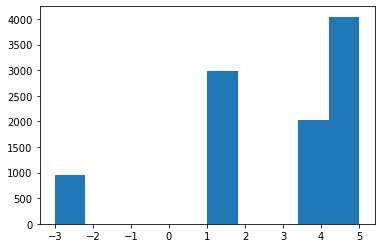

In [3]:
import matplotlib.pyplot as plt
plt.hist(x)

In [4]:
print(array(frek))

[[  -3    1    4    5]
 [ 959 2979 2019 4043]]


In [5]:
from numpy import *
from numpy.random import *
from datetime import datetime
set_printoptions(formatter = {'float' : '{:5.4f}'.format})

n=10
u=rand(n)
Delta1=0.1
Delta2=-0.2
Delta3=0
p1=0.3
p2=0.4

In [6]:
X=Delta1*(u<p1)-Delta2*(p1<u)*(p1+p2>=u)

In [7]:
print(X)

[0.2000 0.0000 0.2000 0.0000 0.1000 0.2000 0.2000 0.2000 0.1000 0.2000]


In [8]:
X[0]

0.2

## Contoh
Kita akan melihat fluktuasi harian harga saham dari suatu asset yang mempunyai peluang naik sebesar $\Delta_1$ dengan peluang $p_1$, dan turun sebesar $\Delta_2$ dengan peluang $p_2$, atau tetap tidak berubah dengan peluang tentunya sebesar $p_3=1-p_1-p_2$. 
Secara singkat, dapat dituliskan sebagai
$$
X\in \{-\Delta_2,0,\Delta_1\} \mbox{ dengan } \left \{ \begin{array}  {l}
P(X=\Delta_1) =p_1 \cr
P(X=0)=1-p_2-p_3\cr
P(X=-\Delta_2)=p_2
\end{array}
\right.
$$

Untuk membangun realisasi dari $X$, kita membangun data dari variabel random $U$ dengan distribusi uniform di $(0,1)$ dan $X$ dengan distribusi
$$
\begin{array}{lcl}
u\leq p_1 & \Rightarrow & X=\Delta_1 \cr
p_1 <u\leq p_1+p_2 & \Rightarrow & X=-\Delta_2 \cr
p_1+p_2 <u & \Rightarrow & X=0
\end{array}
$$

In [9]:
from numpy import *
from numpy.random import *
import matplotlib.pyplot as plt

n=10
Delta1=0.25
Delta2=-0.10
p1=0.2
p2=0.3
u=rand(n)
x=[10]
v=[1,-1,0]
gerak=[]
for i in range(n):
    y=Delta1*(u[i]<p1)+Delta2*(p1<u[i])*(u[i]<=p1+p2)
    x.append(x[i]+y)
    y2=1*(u[i]<p1)-1*(p1<u[i])*(u[i]<=p1+p2)
    gerak.append(y2)
print(x)
    



[10, 10.0, 10.0, 9.9, 9.8, 9.700000000000001, 9.700000000000001, 9.950000000000001, 9.950000000000001, 9.850000000000001, 10.100000000000001]


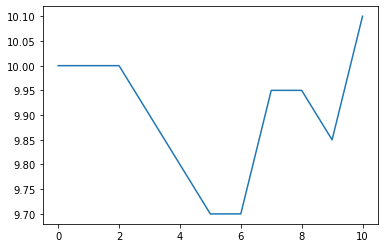

In [10]:
plt.plot([i for i in range(n+1)],x)

In [11]:
print(u)

[0.5839 0.6900 0.4290 0.3869 0.4832 0.7285 0.0788 0.8981 0.4508 0.1209]


In [12]:
print(x)

[10, 10.0, 10.0, 9.9, 9.8, 9.700000000000001, 9.700000000000001, 9.950000000000001, 9.950000000000001, 9.850000000000001, 10.100000000000001]


In [13]:
print(gerak)

[0, 0, -1, -1, -1, 0, 1, 0, -1, 1]


(array([4.0000, 0.0000, 0.0000, 0.0000, 0.0000, 4.0000, 0.0000, 0.0000,
        0.0000, 2.0000]),
 array([-1.0000, -0.8000, -0.6000, -0.4000, -0.2000, 0.0000, 0.2000,
        0.4000, 0.6000, 0.8000, 1.0000]),
 <BarContainer object of 10 artists>)

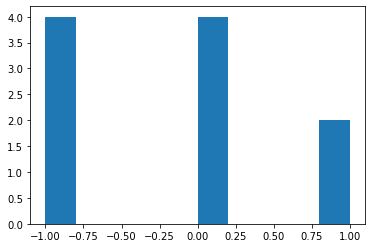

In [14]:
plt.hist(gerak)

In [15]:
geraknormal=[gerak.count(-1)/n,gerak.count(0)/n,gerak.count(1)/n]
print(geraknormal)

[0.4, 0.4, 0.2]


<BarContainer object of 3 artists>

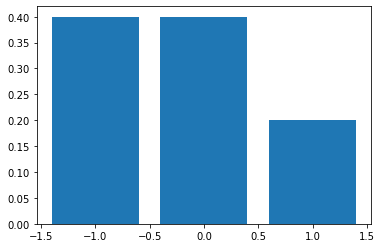

In [16]:
plt.bar([-1,0,1],geraknormal)

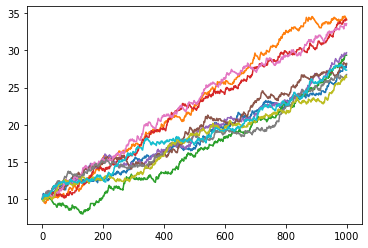

In [17]:
from numpy import *
from numpy.random import *
import matplotlib.pyplot as plt

m=10
Delta1=0.25
Delta2=-0.10
p1=0.2
p2=0.3
n=1000
v=[1,-1,0]
plt.figure(1)   
akhir=[]
for j in range(m):
    u=rand(n)
    x=[10]
    gerak=[]
    for i in range(n):
        y=Delta1*(u[i]<p1)+Delta2*(p1<u[i])*(u[i]<=p1+p2)
        x.append(x[i]+y)
        y2=1*(u[i]<p1)-1*(p1<u[i])*(u[i]<=p1+p2)
        gerak.append(y2)
    plt.plot([i for i in range(n+1)],x)
    akhir.append(x[n])


(array([2.0000, 1.0000, 2.0000, 1.0000, 1.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 3.0000]),
 array([26.4000, 27.1800, 27.9600, 28.7400, 29.5200, 30.3000, 31.0800,
        31.8600, 32.6400, 33.4200, 34.2000]),
 <BarContainer object of 10 artists>)

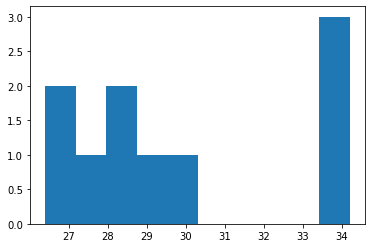

In [18]:
plt.hist(akhir)

{'whiskers': [<matplotlib.lines.Line2D at 0x1d87fc9ef70>,
 'caps': [<matplotlib.lines.Line2D at 0x1d87fcad670>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d87fc9ec10>],
 'medians': [<matplotlib.lines.Line2D at 0x1d87fcadd30>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d87fcb80d0>],
 'means': []}

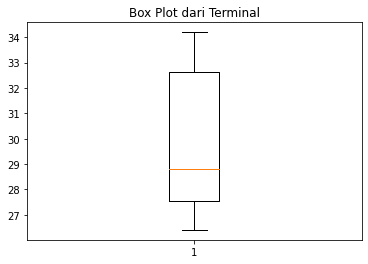

In [19]:
fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot dari Terminal')
ax1.boxplot(akhir)